# Artificial Neural Networks for waves decomposition (or discrete integral transform)

This project aims to use ANNs as a no-brainer for the decomposition of different types of waves, that is, waves described by several functions other than just sine and cosine.

In the case of complex exponentials, this can be seen as a way to obtain a Discrete Fourier Transform without the proper FFT methods. For Bessel functions, this would be equivalent to a Discrete Henkel Transform.

The approach to ANN trained from FFT I saw functionally is from [@endolith](https://gist.github.com/endolith/98863221204541bf017b6cae71cb0a89), from which I used part of the code.

This method is no way intended to be faster or more efficient than FFT, but more flexible and easy to expando to different types of waves.

As a disclaimer, i'm new at GitHub and these calculations are still being made, so if you find something incomplete, it will be done in due time.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special

Using TensorFlow backend.


In [70]:
N=32; batch=10000;

In [96]:
pos=np.arange(N);A=np.random.randn(batch, N) + 1j*np.random.randn(batch, N);K=np.random.randint(0, N, size=(batch, N));x=np.arange(N);

In [97]:
expo=np.zeros((batch, N), dtype='complex128');
for j in range(batch):
    for i in pos:
        expo[j]+=A[j][i]*np.exp(K[j][i]*1j*2*np.pi*(x)/N)

In [98]:
ft=np.zeros_like(K, dtype='complex128');
for j in range(batch):
    for i in pos:
        ft[j][K[j][i]]+=(A[j][i])*N

In [99]:
X = np.hstack([expo.real, expo.imag])
Y = np.hstack([ft.real, ft.imag])

In [100]:
model = keras.Sequential([layers.Dense(N*2, input_dim=N*2, use_bias=False)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 0s 48us/sample - loss: 959.4000
Epoch 2/100
10000/10000 [==============================] - 0s 18us/sample - loss: 785.1089
Epoch 3/100
10000/10000 [==============================] - 0s 18us/sample - loss: 636.7454
Epoch 4/100
10000/10000 [==============================] - 0s 18us/sample - loss: 511.6430
Epoch 5/100
10000/10000 [==============================] - 0s 18us/sample - loss: 407.0461
Epoch 6/100
10000/10000 [==============================] - 0s 17us/sample - loss: 320.4333
Epoch 7/100
10000/10000 [==============================] - 0s 17us/sample - loss: 249.4349
Epoch 8/100
10000/10000 [==============================] - 0s 17us/sample - loss: 191.8537
Epoch 9/100
10000/10000 [==============================] - 0s 17us/sample - loss: 145.7146
Epoch 10/100
10000/10000 [==============================] - 0s 17us/sample - loss: 109.1995
Epoch 11/100
10000/10000 [==============================] - 0s 17u

In [ ]:
test1 = np.arange(N)

In [22]:
def ANN_DFT(x):
    if len(x) != N:
        raise ValueError(f'Input must be length {N}')
    pred = model.predict(np.hstack([x.real, x.imag])[np.newaxis])[0]
    result = pred[:N] + 1j*pred[N:]
    return result

In [ ]:
ANN = ANN_DFT(test1)
FFT = np.fft.fft(test1)
print(f'ANN matches FFT: {np.allclose(ANN, FFT)}')

In [ ]:
plt.plot(abs(ANN))
plt.show

In [ ]:
plt.plot(abs(FFT))
plt.show

In [ ]:
exseno=7*np.sin(3.5*2*np.pi*x/N)

In [ ]:
exsena=np.array(exseno)
ANN = ANN_DFT(exsena)
FFT = np.fft.fft(exsena)
print(f'ANN matches FFT: {np.allclose(ANN, FFT, rtol=1e-05, atol=1e-05)}')

## Sine series

Now that we succesfully started with the best known example, the Fourier Transform, we go to a simpler case, Sine series.

The only changes now are that we will only deal with Real entries (no " dtype='complex128' " specification needed).

In [172]:
N=32; batch=10000;

In [173]:
pos=np.arange(N);A=np.random.uniform(-50, 50, size=(batch, N));K=np.random.randint(0, N, size=(batch, N));x=np.arange(N);

In [174]:
sine=np.zeros((batch, N));
for j in range(batch):
    for i in pos:
        sine[j]+=A[j][i]*np.sin((K[j][i])*np.pi*(x)/N)

In [175]:
st=np.zeros((batch, N));
for j in range(batch):
    for i in pos:
        st[j][K[j][i]]+=A[j][i]

In [177]:
model = keras.Sequential([layers.Dense(N, input_dim=N, use_bias=True)])
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
model.fit(sine, st, epochs=42, batch_size=100)

Train on 10000 samples
Epoch 1/42
10000/10000 [==============================] - 1s 59us/sample - loss: 7.5133
Epoch 2/42
10000/10000 [==============================] - 0s 21us/sample - loss: 6.2600
Epoch 3/42
10000/10000 [==============================] - 0s 21us/sample - loss: 4.9081
Epoch 4/42
10000/10000 [==============================] - 0s 21us/sample - loss: 3.4031
Epoch 5/42
10000/10000 [==============================] - 0s 21us/sample - loss: 1.6744
Epoch 6/42
10000/10000 [==============================] - 0s 20us/sample - loss: 0.4443
Epoch 7/42
10000/10000 [==============================] - 0s 21us/sample - loss: 0.1812
Epoch 8/42
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1516
Epoch 9/42
10000/10000 [==============================] - 0s 21us/sample - loss: 0.1349
Epoch 10/42
10000/10000 [==============================] - 0s 23us/sample - loss: 0.1211
Epoch 11/42
10000/10000 [==============================] - 0s 22us/sample - loss: 0.1093
Epoch 1

In [178]:
exsen=30*np.sin(9*np.pi*x/N)

exsena=np.array([exsen])
pred=model.predict(exsena)
senpred=np.zeros(N);
for i in pos:
    senpred+=pred[0][i]*np.sin(i*np.pi*x/N)

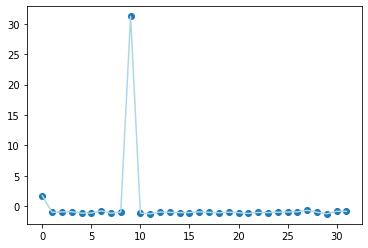

In [179]:
plt.scatter(x,pred[0])
plt.plot(pred[0],"lightblue")
plt.show;

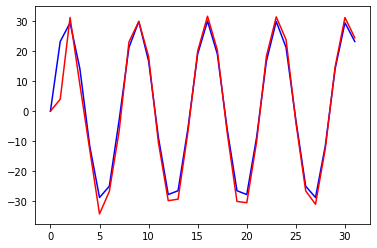

In [180]:
plt.plot(exsen, 'blue')
plt.plot(senpred, 'red')
plt.show;

## Fourier-Bessel Series (Hankel Transform)
Traditionally, decomposition of waves with Bessel functions are not very common, so they are not usually implemented or treated, however circular waves (like on the surface of a drum) are described by Bessel functions, therefore adecomposition of modes should be done by a Hankel Transform.

In this approach, we only have to change the training function from Sine to the desired Bessel and such decomposition is done immediatelly.

In [181]:
N=32; batch=10000;

In [182]:
pos=np.arange(N);A=np.random.randn(batch, N);K=np.random.randint(0, N, size=(batch, N));x=np.arange(N);

In [183]:
bessel=np.zeros((batch, N));
for j in range(batch):
    for i in pos:
        bessel[j]+=A[j][i]*sp.special.jv(2,(K[j][i])*(x))

In [184]:
ht=np.zeros((batch, N));
for j in range(batch):
    for i in pos:
        ht[j][K[j][i]]+=A[j][i]

In [185]:
model = keras.Sequential([layers.Dense(N, input_dim=N, use_bias=True)])
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
model.fit(bessel, ht, epochs=100, batch_size=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 60us/sample - loss: 0.1504
Epoch 2/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.1223
Epoch 3/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0945
Epoch 4/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0755
Epoch 5/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0657
Epoch 6/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0597
Epoch 7/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0550
Epoch 8/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0513
Epoch 9/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0480
Epoch 10/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0452
Epoch 11/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.0

10000/10000 [==============================] - 0s 21us/sample - loss: 0.0043
Epoch 92/100
10000/10000 [==============================] - 0s 24us/sample - loss: 0.0043
Epoch 93/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0042
Epoch 94/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0042
Epoch 95/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0042
Epoch 96/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0041
Epoch 97/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0041
Epoch 98/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0041
Epoch 99/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0040
Epoch 100/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0040


In [189]:
exbess=50*sp.special.jv(2,15*x)+33*sp.special.jv(2,17*x)+44*sp.special.jv(2,5*x)

exbessa=np.array([exbess])
pred=model.predict(exbessa)
besspred=np.zeros(N);
for i in pos:
    besspred+=pred[0][i]*sp.special.jv(2,i*x)

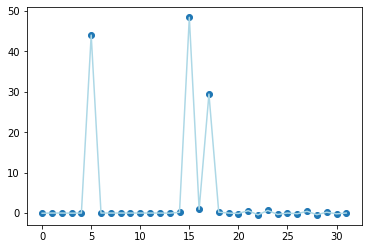

In [190]:
plt.scatter(x,pred[0])
plt.plot(pred[0],"lightblue")
plt.show;

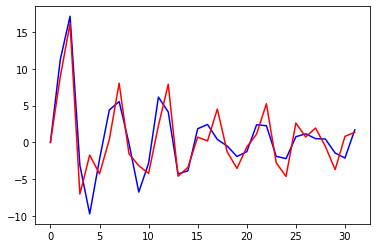

In [191]:
plt.plot(bess, 'blue')
plt.plot(besspred, 'red')
plt.show;